In [20]:
###########========================MOnir Moniruzzaman===============
import sagemaker
sess = sagemaker.Session()
#bucket=sess.default_bucket()
bucket = 'monir-s3-bucket-4-ml'
prefix = 'sagemaker/DEMO-xgboost-churn'

# Define IAM role
import boto3
import re
from sagemaker import get_execution_role
#from sagemaker import AmazonSageMaker-ExecutionRole-20210508T194659/ Monir
role = get_execution_role()

In [21]:

import sys
!{sys.executable} -m pip install xgboost

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [22]:
# importing necessary libraries in jupyter notebook/ -Monir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
#import xgboost as xgb
#from sagemaker.xgboost.estimator import XGBoost as xgb
#from sagemaker.xgboost.estimator import XGBClassifier
from sagemaker.session import s3_input, Session

#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import re, string # using to remove regular expression, special characters in the csv files/ -Monir

In [23]:
!aws s3 cp s3://sagemaker-studio-166809146462-26bi0u2nvyl/Fake.csv ./
!aws s3 cp s3://sagemaker-studio-166809146462-26bi0u2nvyl/True.csv ./

download: s3://sagemaker-studio-166809146462-26bi0u2nvyl/Fake.csv to ./Fake.csv
download: s3://sagemaker-studio-166809146462-26bi0u2nvyl/True.csv to ./True.csv


In [24]:
# importing csv files to the repositery as data frames/ -Monir
monir_df_fake = pd.read_csv("Fake.csv")
monir_df_true = pd.read_csv("True.csv")

In [25]:
monir_df_fake.head() # see how the data in the fake.cse file look like/ Monir

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [26]:
monir_df_fake.shape, monir_df_true.shape # find number of rows and columns/ Monir

((23481, 4), (21417, 4))

In [27]:
monir_df_fake["class"] = 0
monir_df_true["class"] = 1

In [28]:
rdf_fake = monir_df_fake.sample(n=100) # generating random sample of 100 number of rows from fake dataframe/ Monir
rdf_true = monir_df_true.sample(n=100) # generating random sample of 100 number of rows from true dataframe/ Monir

In [29]:
rdf_fake.head()

,title,text,subject,date,class
7677,Ted Cruz Gets Booed At CPAC With Many Walking...,Try as he might to appeal to a broad base of c...,News,"March 5, 2016",0
10474,"Guess how leftists, millennials and ‘Black Liv...","Guess how leftists, millennials and Black Liv...",politics,"Jul 4, 2017",0
738,"Trump Goes On Stunningly Bigoted Rant, Says H...",We always knew that the Trump Administration w...,News,"July 26, 2017",0
11476,REPUBLICAN SENATOR Sends Letter to FBI Directo...,"HERE S THE BACKGROUND:On January 11, 2017, the...",politics,"Mar 6, 2017",0
6771,Fox News Says Non-Whites Should Only Be Depic...,Republicans found their new election year wedg...,News,"April 22, 2016",0


In [30]:
rdf_true.head()

,title,text,subject,date,class
16312,Myanmar gives green light to resume food aid t...,GENEVA (Reuters) - Myanmar authorities have ag...,worldnews,"October 27, 2017",1
19479,Thai government takes action against monk over...,BANGKOK (Reuters) - The Thai government said o...,worldnews,"September 21, 2017",1
7345,Judge tells Trump University litigants they wo...,SAN DIEGO (Reuters) - The U.S. judge overseein...,politicsNews,"November 10, 2016",1
11857,Mexico to recognize Honduran president winner ...,MEXICO CITY (Reuters) - Mexico is poised to re...,worldnews,"December 20, 2017",1
366,Embattled Alabama Republican Senate candidate ...,WASHINGTON (Reuters) - Embattled Republican U....,politicsNews,"December 3, 2017",1


In [31]:
rdf_fake.shape, rdf_true.shape # find number of rows and columns/ Monir

((100, 5), (100, 5))

In [32]:
monir_df_fake = monir_df_fake.drop(rdf_fake.index) # removing rows of random sample from fake dataframe/ Monir
monir_df_true = monir_df_true.drop(rdf_true.index)  # removing rows of random sample from true dataframe/ Monir

In [33]:
monir_df_fake.shape, monir_df_true.shape, rdf_fake.shape, rdf_true.shape # find  number of rows and columns/ Monir

((23381, 5), (21317, 5), (100, 5), (100, 5))

In [34]:
df_for_manual_testing_sample = pd.concat([rdf_fake, rdf_true], axis=0) # Combining/merging DataFrames with Pandas/ Monir 

In [35]:
df_for_manual_testing_sample.to_csv("manual_testing_sample.csv") # Saving as csv file/ Monir 

In [36]:
df_merge_all = pd.concat([monir_df_fake, monir_df_true], axis=0) # Combining/merging DataFrames with Pandas/ Monir 

In [37]:
df_merge_all.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [38]:
df_to_use = df_merge_all.drop(["title", "subject", "date"], axis=1) #drop columns from pandas dataframe/ Monir 

In [39]:
df_to_use.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [40]:
df_to_use = df_to_use.sample(frac=1) # Shuffle DataFrame rows/ Monir

In [41]:
df_to_use.head(10)

,text,class
16421,For anyone who believes they re more CONSERVAT...,0
10994,This is what having no freedom of speech looks...,0
419,Just days after rescinding an Obama policy giv...,0
8415,When thinking about who would be the best fit ...,0
17941,NBC News chairman Andy Lack confessed to nervo...,0
20574,Who can forget the sweet young Dartmouth Colle...,0
9927,NEW YORK (Reuters) - Republican front-runner D...,1
19766,New Wikileaks email shows Bill Clinton wanted ...,0
9886,NEW YORK (Reuters) - U.S. Democratic president...,1
5119,Donald Trump told his supporters to engage in ...,0


In [42]:
df_to_use.isnull().sum() # check out wheather null value available/ Monir

text     0
class    0
dtype: int64

In [43]:
# define a function for removing unnecessary/special characters and return a lower case plain texts/ Monir
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+ |www\.\S+', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [44]:
df_to_use["text"]=df_to_use["text"].apply(word_drop) # apply the function 

In [45]:
df_to_use.head(10)


,text,class
16421,for anyone who believes they re more conservat...,0
10994,this is what having no freedom of speech looks...,0
419,just days after rescinding an obama policy giv...,0
8415,when thinking about who would be the best fit ...,0
17941,nbc news chairman andy lack confessed to nervo...,0
20574,who can forget the sweet young dartmouth colle...,0
9927,new york reuters republican front runner d...,1
19766,new wikileaks email shows bill clinton wanted ...,0
9886,new york reuters u s democratic president...,1
5119,donald trump told his supporters to engage in ...,0


In [46]:
x = df_to_use["text"]
y = df_to_use["class"]

In [47]:
#Split a Dataframe into Train and Test Set where test size is 1/4 / Monir
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .25) 

In [48]:
# For Converting a collection of raw documents to a matrix of TF-IDF features/ Monir
from sklearn.feature_extraction.text import TfidfVectorizer 

In [49]:
My_vec = TfidfVectorizer()
x_vec_train = My_vec.fit_transform(x_train)
x_vec_test = My_vec.transform(x_test)

 ### classification using logistic regression

In [50]:
# Logistic Regression classifier/ Monir
from sklearn.linear_model import LogisticRegression

In [51]:
LR_C = LogisticRegression()
LR_C.fit(x_vec_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
LR_C.score(x_vec_test, y_test)

0.9859507829977628

In [53]:
Pred_LR_C = LR_C.predict(x_vec_test)

In [54]:
print(classification_report(y_test, Pred_LR_C)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5816
           1       0.98      0.99      0.99      5359

    accuracy                           0.99     11175
   macro avg       0.99      0.99      0.99     11175
weighted avg       0.99      0.99      0.99     11175



### classification with Decision Tree

In [55]:
# Logistic Regression classifier/ Monir
from sklearn.tree import DecisionTreeClassifier

In [56]:
DT_C = LogisticRegression()
DT_C.fit(x_vec_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
DT_C.score(x_vec_test, y_test)

0.9859507829977628

In [58]:
Pred_DT_C = LR_C.predict(x_vec_test)

In [59]:
print(classification_report(y_test, Pred_DT_C))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5816
           1       0.98      0.99      0.99      5359

    accuracy                           0.99     11175
   macro avg       0.99      0.99      0.99     11175
weighted avg       0.99      0.99      0.99     11175



### classification with gradient boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
GB_C = GradientBoostingClassifier(random_state=0)
GB_C.fit(x_vec_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
GB_C.score(x_vec_test, y_test)

0.9957941834451901

In [63]:
Pred_GB_C = GB_C.predict(x_vec_test)

In [64]:
print(classification_report(y_test, Pred_GB_C))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5816
           1       0.99      1.00      1.00      5359

    accuracy                           1.00     11175
   macro avg       1.00      1.00      1.00     11175
weighted avg       1.00      1.00      1.00     11175



### classification with Randm Forest 

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
RF_C = RandomForestClassifier(random_state=0)
RF_C.fit(x_vec_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [67]:
RF_C.score(x_vec_test, y_test)

0.9897091722595078

In [68]:
Pred_RF_C = RF_C.predict(x_vec_test)

In [69]:
print(classification_report(y_test, Pred_RF_C))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5816
           1       0.99      0.99      0.99      5359

    accuracy                           0.99     11175
   macro avg       0.99      0.99      0.99     11175
weighted avg       0.99      0.99      0.99     11175



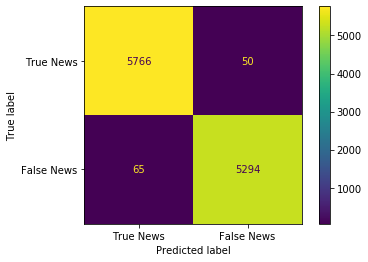

In [70]:
plot_confusion_matrix(RF_C, x_vec_test, y_test, values_format='d', display_labels=["True News", "False News"])

#### classification with XGBoost

In [73]:
XGB_C = xgb.XGBClassifier(objective ='binary:logistic', random_state=0)
XGB_C.fit(x_vec_train, y_train)

[14:44:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [74]:
XGB_C.score(x_vec_test, y_test)

0.9982102908277405

In [75]:
Pred_XGB_C = XGB_C.predict(x_vec_test)

In [ ]:
print(classification_report(y_test, Pred_RF_C))

### manually cheak out classifier prediction 

In [76]:
def output_lebel(n):
    if n==0:
        return "This is a Fake news"
    elif n == 1:
        return "This is NOT a Fake news"

In [77]:
def manual_testing(news):
    testing_news={"text":[news]}
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(word_drop)
    new_x_test = new_def_test["text"]
    new_xv_test = My_vec.transform(new_x_test)

    Pred_LR_C = LR_C.predict(new_xv_test)
    Pred_GB_C = GB_C.predict(new_xv_test)
    Pred_RF_C = RF_C.predict(new_xv_test)
    
    return print("\n\nLRC Prediction: {} \nGBC Preiction: {} \nRFC Preiction: {}".format(output_lebel(Pred_LR_C),
                                                                                         output_lebel(Pred_GB_C),
                                                                                         output_lebel(Pred_RF_C)))

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
news = str(input())
manual_testing(news)